In [2]:
print("hello")

hello


In [3]:
import pandas as pd

In [4]:
df = pd.read_json("All_Beauty.jsonl", lines = True)
df

,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase
0,5,Such a lovely scent but not overpowering.,This spray is really nice. It smells really go...,[],B00YQ6X8EO,B00YQ6X8EO,AGKHLEW2SOWHNMFQIJGBECAF7INQ,2020-05-05 14:08:48.923,0,True
1,4,Works great but smells a little weird.,"This product does what I need it to do, I just...",[],B081TJ8YS3,B081TJ8YS3,AGKHLEW2SOWHNMFQIJGBECAF7INQ,2020-05-04 18:10:55.070,1,True
2,5,Yes!,"Smells good, feels great!",[],B07PNNCSP9,B097R46CSY,AE74DYR3QUGVPZJ3P7RFWBGIX7XQ,2020-05-16 21:41:06.052,2,True
3,1,Synthetic feeling,Felt synthetic,[],B09JS339BZ,B09JS339BZ,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,2022-01-28 18:13:50.220,0,True
4,5,A+,Love it,[],B08BZ63GMJ,B08BZ63GMJ,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,2020-12-30 10:02:43.534,0,True
...,...,...,...,...,...,...,...,...,...,...
701523,4,Four Stars,Conditioner is great shampoo not as I expected,[],B006YUIWKA,B006YUIWKA,AFIXGFVEGLMOTMBTJL7H3VSIETDQ,2016-11-04 02:37:01.000,0,True
701524,1,Pretty,Did not work! Used the whole bottle and my hai...,[],B006YUIWKA,B006YUIWKA,AFV7YZFOJF564EZGET5LG45K4QEA,2016-12-05 03:32:10.000,0,False
701525,5,Great sunless tanner,Product as expected. Shipping was on time.,[],B06ZZV9MZT,B06ZZV9MZT,AHYDCWDMMVMLBX7FY7M7JKADKRDQ,2020-05-27 02:52:54.067,0,True
701526,5,The Crown on top is a Ring!!!,"Not only is it a delicious fragrance, but also...",[],B000HB6VLE,B000HB6VLE,AF6ZIAEN7TQ2WY5ZL77F6JDPV7XQ,2007-07-18 22:36:49.000,4,False


In [5]:
import numpy as np

print("Mean : ",df["rating"].mean(),"\nMedian : ",df["rating"].median(),"\nMode : ",df["rating"].mode()[0])
print("Min : ",min(df["rating"]),"\nMax : ",max(df["rating"]),"\nRange : ",min(df["rating"]),"to ",max(df["rating"]))
print("Standar deviation :",np.std(df["rating"]))


Mean :  3.9602453501499584 
Median :  5.0 
Mode :  5
Min :  1 
Max :  5 
Range :  1 to  5
Standar deviation : 1.4944505317414576


In [6]:
df_sample = df.sample(500)

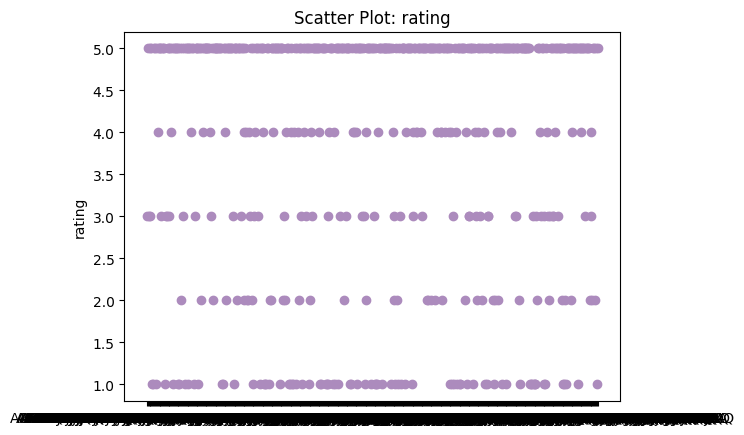

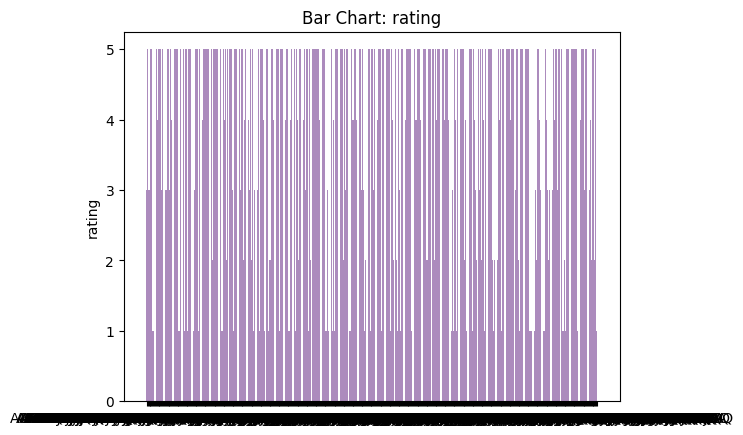

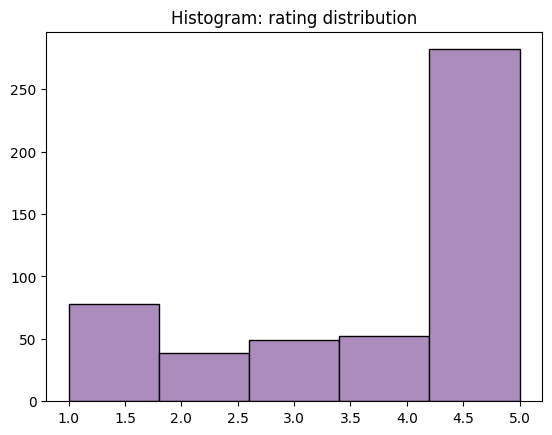

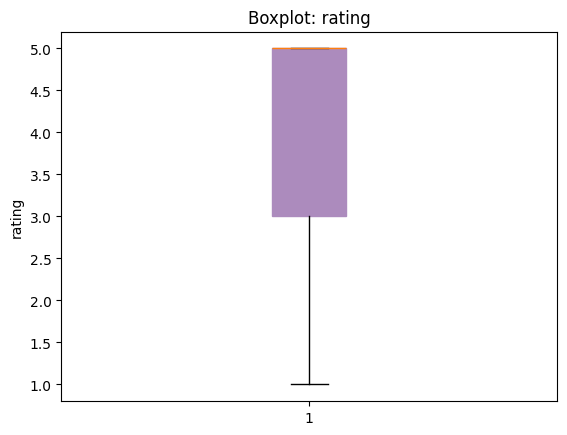

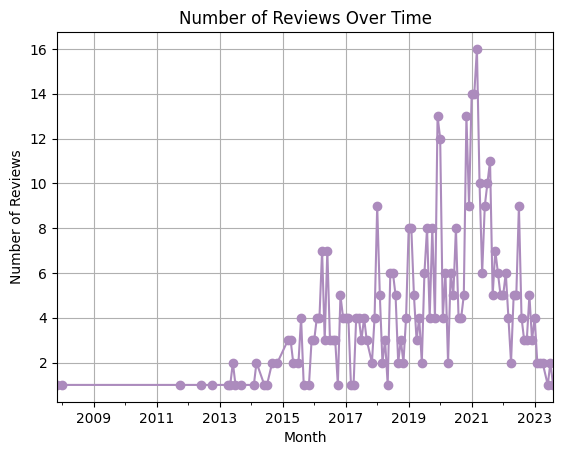

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

custom_color = (172/255, 139/255, 189/255)

plt.scatter(df_sample["user_id"], df_sample["rating"], color=custom_color)
plt.title("Scatter Plot: rating")
plt.ylabel("rating")
plt.show()

plt.bar(df_sample["user_id"], df_sample["rating"], color=custom_color)
plt.title("Bar Chart: rating")
plt.ylabel("rating")
plt.show()

plt.hist(df_sample["rating"], bins=5, edgecolor="black", color=custom_color)
plt.title("Histogram: rating distribution")
plt.show()

plt.boxplot(df_sample["rating"], patch_artist=True,boxprops=dict(facecolor=custom_color, color=custom_color))
plt.title("Boxplot: rating")
plt.ylabel("rating")
plt.show()

df_sample["datetime"] = pd.to_datetime(df_sample["timestamp"], unit="ms")
df_sample["month"] = df_sample["datetime"].dt.to_period("M")

reviews_per_month = df_sample.groupby("month").size()
reviews_per_month.plot(kind="line", marker="o", color=custom_color)
plt.title("Number of Reviews Over Time")
plt.xlabel("Month")
plt.ylabel("Number of Reviews")
plt.grid(True)
plt.show()


In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

df=df.sample(100000)

df['title'] = df['title'].astype(str).str.lower().str.strip()

tfidf = TfidfVectorizer(ngram_range=(1,2), max_features=20000)
X = tfidf.fit_transform(df['title'])

print("Feature matrix shape:", X.shape)


Feature matrix shape: (100000, 20000)


In [9]:
from sklearn.ensemble import RandomForestRegressor

y = df['rating'].astype(float).values

model = RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1,verbose=2)
model.fit(X, y)

print("Done ")

building tree 1 of 200
building tree 2 of 200
building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.


building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
building tree 43 of 200
building tree 44 of 200
building tree 45 of 200
building tree 46 of 200
building tree 47 of 200
building tree 48 of 200
building tree 49 of 200
building tree 50 of 200
building tree 51 of 200
building tree 52 of 200
building tree 53 of 200
building tree 54 of 200
building tree 55 of 200
building tree 56 of 200
building tree 57 of 200
building tree 58 of 200
building tree 59 of 200
building tree 60 of 200
building tree 61 of 200
building tree 62 of 200
building tree 63 of 200
building tree 64 of 200
building tree 65 of 200
building tree 66 of 200
building tree 67

[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:  3.6min


building tree 131 of 200
building tree 132 of 200
building tree 133 of 200
building tree 134 of 200
building tree 135 of 200
building tree 136 of 200
building tree 137 of 200
building tree 138 of 200
building tree 139 of 200
building tree 140 of 200
building tree 141 of 200
building tree 142 of 200
building tree 143 of 200
building tree 144 of 200
building tree 145 of 200
building tree 146 of 200
building tree 147 of 200
building tree 148 of 200
building tree 149 of 200
building tree 150 of 200
building tree 151 of 200
building tree 152 of 200
building tree 153 of 200
building tree 154 of 200
building tree 155 of 200
building tree 156 of 200
building tree 157 of 200
building tree 158 of 200
building tree 159 of 200
building tree 160 of 200
building tree 161 of 200
building tree 162 of 200
building tree 163 of 200
building tree 164 of 200
building tree 165 of 200
building tree 166 of 200
building tree 167 of 200
building tree 168 of 200
building tree 169 of 200
building tree 170 of 200


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  7.6min finished


In [10]:
new_title = "this product is very bad"

new_X = tfidf.transform([new_title])

pred = model.predict(new_X)[0]
print(f"Predicted rating for '{new_title}': {pred:.2f}")


Predicted rating for 'this product is very bad': 2.21


[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  98 tasks      | elapsed:    0.0s
[Parallel(n_jobs=32)]: Done 200 out of 200 | elapsed:    0.0s finished


In [12]:
import joblib

joblib.dump(model, "random_forest_model.pkl")
joblib.dump(tfidf, "tfidf_vectorizer.pkl")

print("Model and TF-IDF vectorizer saved successfully!")


Model and TF-IDF vectorizer saved successfully!


In [ ]:
import joblib
from youtube_comment_downloader import YoutubeCommentDownloader
import numpy as np

model = joblib.load("random_forest_model.pkl")
tfidf = joblib.load("tfidf_vectorizer.pkl")
print("Model and TF-IDF loaded successfully!")

def get_youtube_comments(video_url, max_comments=100):
    downloader = YoutubeCommentDownloader()
    comments_list = []
    for i, comment in enumerate(downloader.get_comments_from_url(video_url)):
        comments_list.append(comment['text'])  
        if i + 1 >= max_comments:  
            break
    return comments_list

def rate_video(video_url):
    comments = get_youtube_comments(video_url)
    if not comments:
        print("No comments found.")
        return None
    
    X = tfidf.transform(comments)  
    ratings = model.predict(X)
    
    final_rating = np.mean(ratings)

    for comment, rating in zip(comments, ratings):
        print(f"Comment: {comment}\nPredicted Rating: {rating:.2f}\n")
    
    print(f"\n--- Final Video Rating: {final_rating:.2f} ---")
    return final_rating

video_url = "https://www.youtube.com/watch?v=uw9d2ZKYdHM"
rate_video(video_url)


Model and TF-IDF loaded successfully!
Comment: I would not have used ISO alcohol. I would have used Break Cleaner.  8:55
Predicted Rating: 3.72

Comment: You mentioned without needing speciality tools. No offense but I would still classify having tools to zoom in enough to see the pins a still a speciality tool. Lol
Predicted Rating: 3.81

Comment: welp if I'm learning something is not to buy a motherboard with pins, CPU pins look easier to fix.
Predicted Rating: 2.81

Comment: great, do a salvage themed scrapyard wars now! ... and include that blue eyed chick Sarah
Predicted Rating: 5.00

Comment: I've unintentionally done this. Bought a "refurbished" mobo and two pcie filtering caps were ripped off. Didn't feel like sending it back so I bought replacements for a couple bucks and soldered them on. It would have worked okay without them, they were just for filtering the pcie power. I ONLY buy used computer parts/laptops.
Predicted Rating: 2.99

Comment: [don't know i anyone else asked]

[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  98 tasks      | elapsed:    0.0s
[Parallel(n_jobs=32)]: Done 200 out of 200 | elapsed:    0.0s finished


np.float64(3.628967432847054)